# "Implementing a Machine Learning Algorithm from Scratch"
> "Linear regression from scratch"

- author: Celia Zhang
- toc: true
- branch: master
- badges: true
- comments: true
- categories: [Python, machine learning, ML]

Agenda:
1. Load the data that has x and y
2. Normalize the date and explain why to normalize the data
3. Plot the data
4. Define hypothesis function
5. Use cost function to evaluate quality of model
6. Gradient descent to minimize the cost function
7. Put the code together


### Background on Linear Regression

Linear regression is a statistical technique used to model the relationship between a dependent variable and one or more independent variables by fitting a linear euqation to the oberved data. The goal is to find the best-fitting line that minimizes the difference between the predicted value and the actual values.

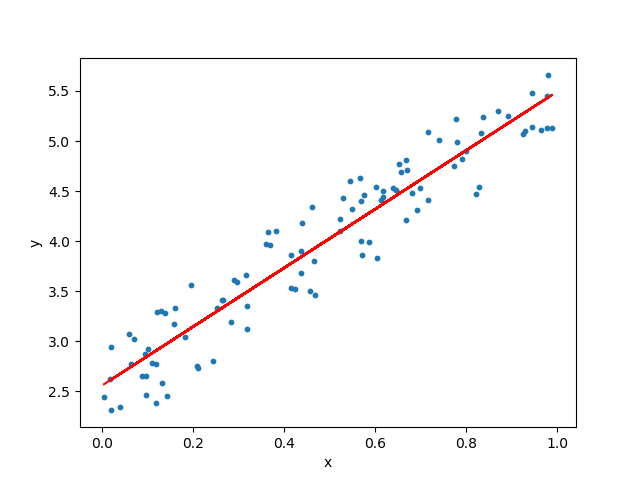

*What do you call a linear regression model at a party?
The life of the scatterplot!*

### Application

1. Sales: Linear regression can be used to forecast sales based on historical data.
2. Credit scoring: Linear regression can be employed to build credit scoring models by analyzing factors such as income, credit history and outstanding credict to predict the creditworthiness of individuals.
4. Demand forecasting: Linear regression can be used to predict demand for products or services so businesses can plan ahead.
5. Medical research: Linear regression can be implemented in medical research by analyzing relationship between lifestyle factos and disease outcomes to understand implications of certain lifestyle habits on healing of certain diseases.
6. Energy consumption analysis: Linear regression can be implemented to analyze the relationship between energy consumption and building chatacteristics to help with designing energy-efficient systems in the future.

Linear regression is a simple but powerful tool!

How to read the blog:


*   The is a comment above every line of code explaining what that code does





Let's first import the libraries we will be using.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### **Regression**
*What?
Why?
How?
*
Regression is finding a relationship between the one or more independent and one dependent variable. Linear Regression is when we are finding a relationship that has a model that finds the best fit linear line (which explains the first word "linear"). Regression problems try to predict results with an output that is continuous set ([1,5] is a continuous set where as {1,5} is discrete).

Starting off, in order to use the data, we will have to load the data.

In [ ]:
def load_data(filename):

	#The terms separated by commas inside the bracket are called parameters. "filename" parameter is the path to the CSV file.
  #It can be a path on the local machine or a valid URL. The other parameters are optional. sep is the delimeter to use. index_col is True when there is an index column.
  #"index_col=False" can be used to force pandas to not use the first column as the index.
	df = pd.read_csv(filename, sep=",", index_col=False)

	#For this example, we have more than one feature in out dataset which means we will be looking at a multivariate linear regression.
	df.columns = ["x1", "x2", "y"]
	data = np.array(df, dtype=float)

	#Plotting x vs y. The first two columns(data[:,:2]) are our features(x). The last column(data[:, -1]) is what we are going to be predicting.
	plot_data(data[:,:2], data[:, -1])

	normalize(data)
  #Look in the section below about normalizing the data

	return data[:,:2], data[:, -1]

### **Normalize the Data**
*What? Why? How?* In order to prevent unwanted bias in the machine model model, we normalize (or can be called "scale") the features so that they all lie within the same rage ([-1 to 1] or [0 to 1]). One common normalization method is *feature normalization*.

Z = (x — μ) / σ

μ → mean

σ → standard deviation

z → our normalized feature and x → the non-normalized feature.

In [ ]:
def normalize(data):
  for i in range(0, data.shape[1]-1):

    # we are making the non-nomralized features normalized here. np.mean() is calculating the mean and np.std() is calculating the standard deviation.
    data[:,i] = (data[:,i] - np.mean(data[:,i]))/np.std(data[:,i]())

### **Hypothesis**
*What? Why? How? An Analogy*
a mathematical function or model that converts input data into output predictions. Hypothesis is an explanation for something.

For linear regression, the regression would take the form of

$$
h_\theta (x) = θ_0 + θ_1 x_1 + θ_2 x_2 + θ_3 x_3 + ..... + θ_n x_n
$$

If the datatset has only 2 features, our current problem the hypothesis is

$$
h_\theta (x) = θ_0 + θ_1 x_1 + θ_2 x_2
$$

where x1 and x2 are the two features.

Why does the linear regression formula look like this? Recall back to high school, a linear equation takes the form $ y=a+m * x$

m → the slope

a → the intercept.

For linear regression, we write it in the form 
$$
h = θ_0 + θ_1 * x
$$
 h → the hypothesis or the predicted dependent variable.

 x → the input feature.

 θ_0 and θ_1 → the coefficients.

 Theta values are randomly picked and then refined using gradien descent by minimizing the cost function.(Don't worry we will talk about them later

In [ ]:
def h(x,theta):
	return np.matmul(x, theta)

np.matmul() returns the matrix product of two arrays.  The example is as follows:

In [ ]:
import numpy.matlib
import numpy as np

a = [[1,0],[0,1]]
b = [[4,1],[2,2]]
print np.matmul(a,b)

It will produce the following output −

In [ ]:
[[4  1]
 [2  2]]

### **Cost Function**
*What?
Why?
How?
An Analogy*
Use cost function to evaluate the quality of the current hypothesis and help us to make the best changes. The cost value calculates the "cost" which can be thought of as the difference between prediction and the true value. The cost function that we use for regression is called Mean Squared Error.


$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta (x^i) - y^i)^2
$$

J(θ) → cost function

m → the size of the data.

h(x) → our hypothesis function

Looking close at the equation, J(Θ) is directly proportional to square of the difference between the prediction and the true value. We want the difference to be as small as possible and hence we must minimize the cost function.

In [ ]:
def cost_function(x, y, theta):

#There are two methods when it comes to writing the line of code below.

	#Since h(x) is a matrix, in order to multiply two matrixes together, we multiply itself with the transposed version of itself. T@(matrix) transposes the matrix. Please review how we calculate the power of a matrix manually: https://www.nagwa.com/en/explainers/432180315293/
	return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

HOW DO WE MINIMIZE THE COST FUNCTION? GRADIENT DESCENT!

### **Gradient Descent**
*What? Why? How? An Analogy* An optimization algorithm that aims to adjust the parameters in order to minimize the cost function.



In essense, Gradient Descent is an Optimization Algorithm. All machine learning algorithms require an optimization algorithm.

$$
\theta_j := \theta_j - \alpha \frac{∂}{\partial\theta_j} J(\theta_0, \theta_1) \quad(for\quad j = 0 \quad and\quad j = 1)
$$

In the equation above, θ_0 and θ_1 are the parameters and gradient descent adjusts these parameters to minimize the cost function. α is the learning rate.

We achieved the equation above by taking the partial derivative of the cost function based on θ_0 abd θ_1 respecitvely. The reason is that we are trying to minimize the cost function. Recall in first year math, how you learned partial derivative can calculate minimums and maximums!

Feel free to review the concepts:
https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/optimizing-multivariable-functions/a/maximums-minimums-and-saddle-points

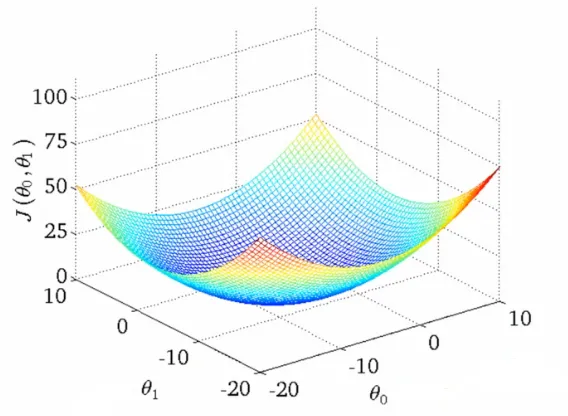

Refer to the image above, what we ultimately try to accomplish is to reach the global minimum which is the bottom of the bowl above (called the "global optimum"). By adjusting parameter to get to a low cost, we reach the bottom of the bowl which means we have the best parameters for our hypothesis function.

$$
\theta_j := \theta_j - \alpha \frac{∂}{\partial\theta_j} J(\theta_0, \theta_1) \quad(for\quad j = 0 \quad and\quad j = 1)
$$

Let's dissect this equation.
J(θ_0,θ_1) is the cost function. We calculate the derivative of the cost function which gives us the slope so we would be able to understand which "direction" to update our parameters so we arrive at global minimum.
α is the learning rate. Learning rate is a hyper-parameter that adjusts the amount of change we apply to the parameters. If the learning rate is too low, then gradient descent can be too slow to converge. If the learning rate is too high, we might overshoot the minumum.

In the code below, we have 2 features and 3 parameters

*Note **Learning Rate** and **Number of Epochs** is called Hyperparameter. Hyperparameters are used to fine tune model by fitting model more accurately around the data but it has the risk of overfitting.*

In [ ]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
	m = x.shape[0]
	J_all = []
	.
	#Since we set the number of epochs as 10, this function adjusts the parameter using gradient descent repeating for 10 times
	for _ in range(num_epochs):
		h_x = h(x, theta)
		cost_ = (1/m)*(x.T@(h_x - y))
		theta = theta - (learning_rate)*cost_
		J_all.append(cost_function(x, y, theta))

	return theta, J_all

### **Putting Code in the Correct Order**

*The dataset has the dimension of (50, 2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
x,y = load_data("data")

#Since we have 3 parameters and 2 features, this means that the parameter vector has a dimension of (3,1) but feature vector has a dimension of (46,2). It is not mathematically possible to multiply these two matrices. (You can review here: https://www.mathsisfun.com/algebra/matrix-multiplying.html)
y = np.reshape(y, (50,1))

#An extra column is added to the beginning of x to allow matrix multiplication.
x = np.hstack((np.ones((x.shape[0],1)), x))

#Intializing our theta vecotr with zeros
theta = np.zeros((x.shape[1], 1))


#learning rate and number of epochs(an epoch is the number of times the alogrithm will go through the entire dataset) are called hyperparameters.
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", J)
print("Parameters: ", theta)

#for testing and plotting cost
n_epochs = []
jplot = []
count = 0
for i in J_all:
	jplot.append(i[0][0])
	n_epochs.append(count)
	count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

test(theta, [1600, 2])

**Implementation Examples**
(Examples of how people use a ready-made machine learning algorithm to build a machine learning model in Python.)
https://www.freecodecamp.org/news/how-to-build-and-train-linear-and-logistic-regression-ml-models-in-python/
There is a full code at the end of Section 1 on this web page.
https://www.edureka.co/blog/linear-regression-for-machine-learning/#example
Go to the section for "Use Case – Implementing Linear Regression"

**Steps for Writing any kind of Algorithm from Scratch**

1. Understand the algorithm. (what is the algorithm? what can the algorithm be used for? Under what situation can the algorithm be used?)
2. Find different sources to reference.
3. Break the algorithm into chunks.
4. Reference a similar algorithm that is simple to understand.
5. Validate with a test.
6. Write up the process as if you are trying to teach it to someone else.

### Want to try coming up with an algorithm on your own?
### Logistic Regression

Now we have dissected Linear Regression, guess how would a logistic regression model algorithm differ from a linear regression one? It is in the name. The hypothesis for logitic regression is the sigmoid function.
Since the hypothesis is different, we also cannot be using the same cost function. Since the hypothesis for logistic regression involves a sigmoid function and is non-linear.

### Generic Guide on How to Pick an Algorithm

Types of machine learning tasks:


*   Supervised learning
*   Unsupervised learning
*   Reinforcement Learning

Questions to ask:

Input:
Is it a labeled data?
Yes, then it is a supervised learning. If it is unlabeled and needs a structure, then it is an unsupervised learning probelm. If the we are trying to optimize the model, then it is a reinforcement learning problem.

Output:
Is the out put of the model a number?
Yes, then it is regression. If the output is a class, it is a classification problem. If the output of the model is different sets, it is a clustering problem.

Second step is understanding your data which also helps when trying to choose the right algorithm. So what should we do?

Analyze the data

Use visuals and plots.

Process the data

Making sure we have all the appropriate data

Transform the data

Transform raw data into features that better represent the underlying problem.

Find the available algorithms

Some things to consider when picking find a algorithm that is *applicable* and "practical" to implement:


*   Accuracy of the model
*   Complexity of the model
*   Scalability of the model
*   How long it takes to perform each step

Optimize hyperparameters

Three options for optimizing hyperparameters:
Grid Search, Random Search and Bayesian Optimization

*Vocabulary Definitions*

Supervise Learning:
Data is already labellled. Humans are teaching the algorithm what conclusions they should have.

Unsupervised learning:
More closely aligned with true AI. Computers are identifying complex processes and patterns.

Reinforcement learning:
Algorithms learn how to achieve a complex objective and how to optimize a process. Computers learn from experience. For exmaple, algorithm training itself to play chess and win its component in the fewst steps.




